In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_o= pd.read_csv("../Data/data_limpios.csv")
df_o.sample(2)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
1092,1093,b,2022-02-02,0,sports,1462,football,0,256.40,0.27,...,NaN,south,34.0,f,mobile,28,NaN,safari,paid,no
572,573,a,2022-01-19,0,electronics,1444,laptop,0,310.21,0.10,...,NaN,west,18.0,m,desktop,12,NaN,other,organic,no


In [3]:
df =df_o.copy()

In [7]:
df.isnull().mean()*100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [ ]:
df_nulos = df.loc[:,df.isnull().sum()>0] #te permite ver las columnas que tengan nulos
df_nulos
# Si hay porcentage muy alto en columnas categoricas se genera un acategoria nueva

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


In [11]:
df.shape

(2000, 22)

## Nulos categoricas

In [12]:
for col in df_nulos.select_dtypes(include="O").columns:
  print(col.upper)
  display(df_nulos[col].value_counts()/df_nulos.shape[0]*100)
  print("--------")

<built-in method upper of str object at 0x121284f30>


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

--------
<built-in method upper of str object at 0x120e5e9b0>


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

--------
<built-in method upper of str object at 0x12134f330>


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

--------


In [ ]:
# no hay ninguno que destaque por lo que se deberia de generar una nueva categoria.

In [27]:
def subplots_col_cat(dataframe):
  categorical_col = dataframe.select_dtypes(include="O").columns
  print(categorical_col)
  if len(categorical_col)==0:
    return" No hay columnas categoricas"
  # configuracion de los gráficos
  num_cols=len(categorical_col)
  rows=(num_cols+2)//3 #Saber las filas para 3 columnas.
  fig, axes =plt.subplots(rows, 3, figsize= (15, rows*5) )
  axes = axes.flatten() # convertir los ejes en 1d para facil iteración
  
  #Generar los gráficos para cada columna
  for i, col in enumerate(categorical_col):
    sns.countplot(data=dataframe, x=col, ax=axes[i],hue=col,legend=False)
    axes[i].set_title(f'Distribucion de {col}')
    
  #Eliminar elementos sobrantes de las columnas
  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()
    

Index(['payment_method', 'shipping_method', 'coupon_used'], dtype='object')


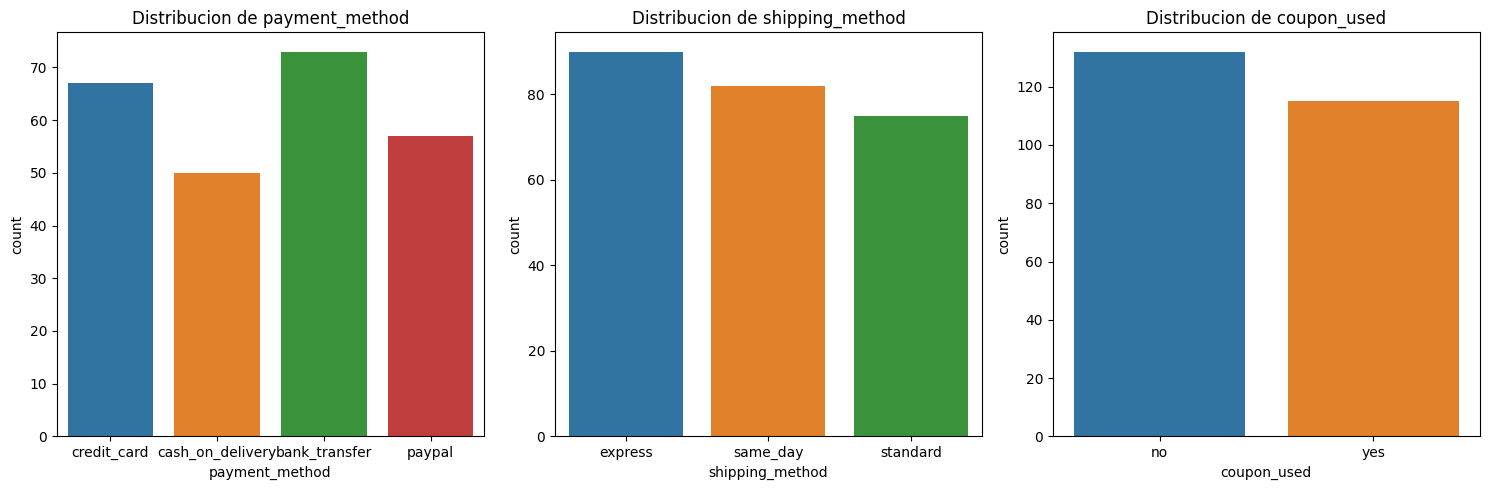

In [29]:
subplots_col_cat(df_nulos)

In [31]:
df_nulos.select_dtypes(include="O").isnull().mean()*100

payment_method     87.65
shipping_method    87.65
coupon_used        87.65
dtype: float64

In [33]:
df_nocompra=df[df['conversion']==0]
df_nocompra.isnull().mean()*100

user_id               0.000000
group                 0.000000
visit_date            0.000000
conversion            0.000000
product_category      0.000000
product_id            0.000000
product_name          0.000000
quantity              0.000000
price                 1.711352
discount              1.939532
total_value           0.000000
payment_method      100.000000
shipping_method     100.000000
region                0.000000
customer_age          2.110667
customer_gender       0.000000
device                0.000000
session_duration      0.000000
coupon_used         100.000000
browser               0.000000
referral_source       0.000000
conversion_str        0.000000
dtype: float64

se ha comprobado que los nulos de las columnas categ son debido a que no se ha realizado la compra, por lo que no se ha utuizado ningun cupon, metood de pago y ningun tipo de envio.

In [34]:
df.loc[:,df.select_dtypes(include="O").columns] = df.select_dtypes(include="O").fillna('no_conversion')

In [35]:
df.isnull().mean()*100

user_id             0.0
group               0.0
visit_date          0.0
conversion          0.0
product_category    0.0
product_id          0.0
product_name        0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
payment_method      0.0
shipping_method     0.0
region              0.0
customer_age        2.0
customer_gender     0.0
device              0.0
session_duration    0.0
coupon_used         0.0
browser             0.0
referral_source     0.0
conversion_str      0.0
dtype: float64